In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import seaborn as sns

# Cargar el dataset limpio y estandarizado
df = pd.read_csv("avocado_final_clean.csv")

# Separar variable objetivo y variables predictoras
target = "AveragePrice"
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

cols_to_drop = [
    "AveragePrice", "4046", "4225", "4770",
    "Total Bags", "Small Bags", "Large Bags", "year_date"
]

# Identificar columnas de región (ya sin eliminar ninguna)
region_cols = [c for c in df.columns if c.startswith("region_")]

# Variables finales seleccionadas
selected_features = [
    "Total Volume", "XLarge Bags", "year", "month", "type_organic"
] + region_cols

# Filtramos solo las columnas que realmente existen
selected_features = [c for c in selected_features if c in df.columns]
print(f"✅ Variables seleccionadas para el modelo: {len(selected_features)} columnas")

# ------------------------------------------------------------
# 4️⃣ Separar variable objetivo y predictoras
# ------------------------------------------------------------
X_train = train_df[selected_features]
y_train = train_df["AveragePrice"]

X_test = test_df[selected_features]
y_test = test_df["AveragePrice"]

# ------------------------------------------------------------
# 5️⃣ Entrenar modelo de Regresión Lineal
# ------------------------------------------------------------
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print("✅ Modelo de Regresión Lineal entrenado correctamente.")

# ------------------------------------------------------------
# 6️⃣ Realizar predicciones y evaluar desempeño
# ------------------------------------------------------------
y_pred_lr = lr_model.predict(X_test)

# Entrenamiento del modelo Random Forest

rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
print("✅ Modelo Random Forest entrenado correctamente.")

# Entrenamiento de la red neuronal
mlp = MLPRegressor(
    hidden_layer_sizes=(100, 50),  # dos capas ocultas
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42
)


mlp.fit(X_train, y_train)



y_pred_nn = mlp.predict(X_test)
y_pred_rf = rf.predict(X_test)

✅ Variables seleccionadas para el modelo: 58 columnas
✅ Modelo de Regresión Lineal entrenado correctamente.
✅ Modelo Random Forest entrenado correctamente.


DataFrame 'df_results' con las métricas creado:
          Modelo   RMSE     R2
Regresión Lineal 0.2490 0.6029
   Random Forest 0.1194 0.9087
    Red Neuronal 0.1200 0.9078


/tmp/ipykernel_10154/2721562450.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot_r2 = sns.barplot(


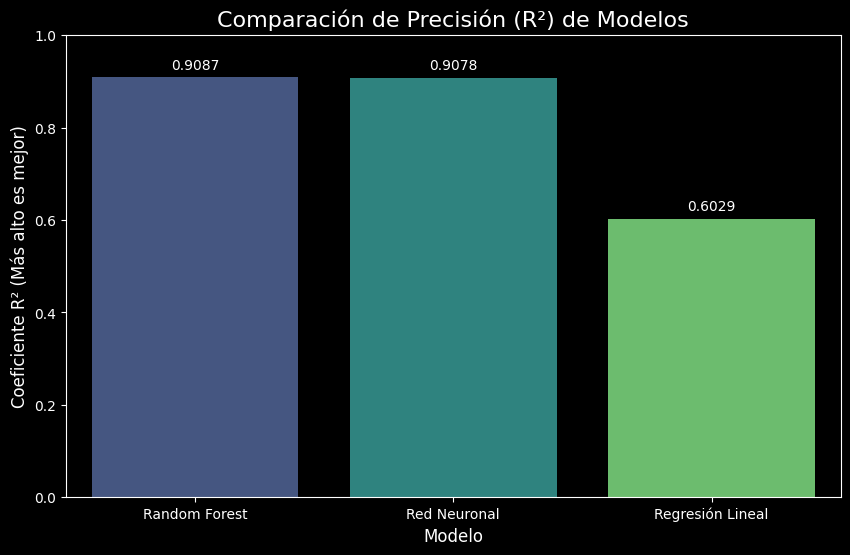

/tmp/ipykernel_10154/2721562450.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot_mse = sns.barplot(


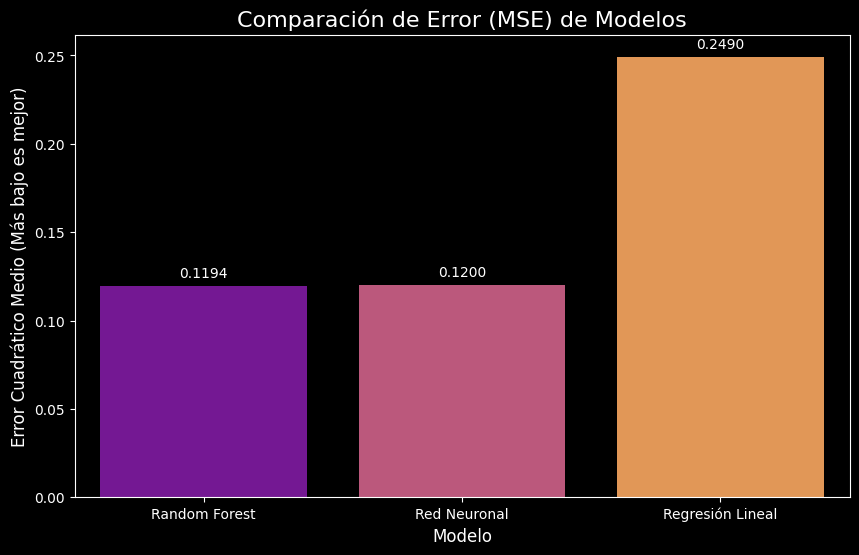

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# --- 1. Crear el DataFrame con tus resultados de métricas ---
# (Estos son los números de tu output anterior)
results = {
    'Modelo': ['Regresión Lineal', 'Random Forest', 'Red Neuronal'],
    'RMSE': [0.2490, 0.1194, 0.1200],
    'R2': [0.6029, 0.9087, 0.9078]
}
df_results = pd.DataFrame(results)

print("DataFrame 'df_results' con las métricas creado:")
print(df_results.to_string(index=False))


# --- 2. Gráfico de Barras: Comparación de R² (Precisión) ---

# Ordenamos los resultados por R2 (de mejor a peor)
df_results_sorted_r2 = df_results.sort_values(by='R2', ascending=False)

plt.figure(figsize=(10, 6))
barplot_r2 = sns.barplot(
    data=df_results_sorted_r2,
    x='Modelo',
    y='R2',
    palette='viridis' # Esquema de color
)

# Añadir etiquetas con el valor exacto en cada barra
for p in barplot_r2.patches:
    barplot_r2.annotate(format(p.get_height(), '.4f'), # Formato a 4 decimales
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points')

plt.title('Comparación de Precisión (R²) de Modelos', fontsize=16)
plt.xlabel('Modelo', fontsize=12)
plt.ylabel('Coeficiente R² (Más alto es mejor)', fontsize=12)
plt.ylim(0, 1.0) # El R² va de 0 a 1
plt.show()


# --- 3. Gráfico de Barras: Comparación de MSE (Error) ---

# Ordenamos los resultados por MSE (de mejor a peor)
df_results_sorted_mse = df_results.sort_values(by='RMSE', ascending=True)

plt.figure(figsize=(10, 6))
barplot_mse = sns.barplot(
    data=df_results_sorted_mse,
    x='Modelo',
    y='RMSE',
    palette='plasma' # Esquema de color
)

# Añadir etiquetas con el valor exacto en cada barra
for p in barplot_mse.patches:
    barplot_mse.annotate(format(p.get_height(), '.4f'), # Formato a 4 decimales
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points')

plt.title('Comparación de Error (MSE) de Modelos', fontsize=16)
plt.xlabel('Modelo', fontsize=12)
plt.ylabel('Error Cuadrático Medio (Más bajo es mejor)', fontsize=12)
plt.show()